# 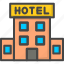 Investigate Hotel Business using Data Visualization
*Wika Rabila Putri (DS 41 & JAP 28)*

**Tool: Jupyter Notebook**

**Programming Language: Python**

**Libraries: Pandas, NumPy**

**Visualization: Matplotlib, Seaborn**


**Dataset: https://drive.google.com/file/d/1gxEREEb3HjAtaJttrinEMXkKJX_gYx_y/view?usp=sharing**

## Overview

Industri perhotelan adalah sektor yang kompetitif dan membutuhkan analisis berkelanjutan untuk menjaga profitabilitas dan kepuasan pelanggan. Dengan munculnya platform pemesanan digital dan large datasets, kita dapat memanfaatkan visualisasi data untuk mendapatkan insight lebih dalam. Fokus yang kita tuju adalah untuk mengetahui bagaimana perilaku pelanggan kita dalam melakukan pemesanan hotel, dan hubungannya terhadap tingkat pembatalan pemesanan hotel.

**Pertanyaan:**

1. Jenis hotel apa yang paling sering dikunjungi oleh pelanggan?
2. Apakah durasi menginap mempengaruhi tingkat pembatalan pemesanan hotel?
3. Apakah jarak waktu antara pemesanan hotel dan hari kedatangan tamu mempengaruhi tingkat pembatalan pemesanan hotel?

**Tujuan:**

1. Preprocessing Data
2. Monthly Hotel Booking Analysis Based on Hotel Type (Analisis Pemesanan Bulanan Berdasarkan Jenis Hotel)
3. Impact Analysis of Stays Duration on Hotel Bookings Cancellation Rates (Analisis Dampak Durasi Menginap pada Tingkat Pembatalan Pemesanan Hotel)
4. Impact Analysis of Lead Time on Hotel Bookings Cancellation Rates (Analisis Dampak Waktu Tunggu pada Tingkat Pembatalan Pemesanan Hotel)

In [1]:
#import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 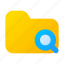 Explore Data

In [2]:
df = pd.read_csv(r'C:\Users\Wika Rabila Putri\Documents\Documents Lenovo\Rakamin\JAP\MINPRO 2 Investigate Business Hotel\hotel_bookings_data.csv')
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
7435,Resort Hotel,1,86,2018,October,33,9,0,3,2,...,0,No Deposit,240.0,NaN,0,Personal,205.67,0,0,Canceled
86278,City Hotel,0,2,2018,May,14,30,0,1,1,...,0,No Deposit,9.0,NaN,0,Personal,89.00,0,0,Check-Out
110013,City Hotel,0,8,2019,June,16,19,0,2,2,...,0,No Deposit,9.0,NaN,0,Personal,144.00,0,0,Check-Out
74771,City Hotel,0,241,2017,December,43,19,1,2,1,...,1,No Deposit,1.0,NaN,0,Family,50.00,0,0,Check-Out
3704,Resort Hotel,0,165,2017,February,53,30,0,4,2,...,0,No Deposit,308.0,NaN,122,Family,136.50,0,0,Check-Out


# TASK 1: Data Preprocessing

In [3]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
#cek data duplikat

num_duplicates = df.duplicated().sum()
print(f'Jumlah data duplikat: {num_duplicates}')

Jumlah data duplikat: 33261


**Terdapat 119.390 data dengan 29 kolom/fitur**

**Tipe data terdiri dari object, int64, dan float64**

**Jumlah data duplikat sebanyak 33.261**

In [5]:
#cek valaue setiap fitur
for col in df.columns:
    print("{} have {} unique values: {}".format(col, df[col].nunique(), df[col].dtypes))
    if df[col].dtypes == 'int64' or df[col].dtypes == 'float64' or df[col].dtypes == 'object':
        print("{} values: {}".format(col,df[col].unique()))
        print('-' * 100)

hotel have 2 unique values: object
hotel values: ['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------------------------------------
is_canceled have 2 unique values: int64
is_canceled values: [0 1]
----------------------------------------------------------------------------------------------------
lead_time have 479 unique values: int64
lead_time values: [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 46

In [6]:
#handling missing values

missing_values = df.isnull().sum()
print("Jumlah missing values di setiap kolom:")
print(missing_values)

Jumlah missing values di setiap kolom:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_li

**Terdapat missing values, yaitu:**

**chlidren 4, city 488, agent 16.340, dan company 112.593**

## Statistics Descriptive

### Fitur Numerik

In [7]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.37,0.48,0.00,0.00,0.00,1.0,1.0
lead_time,119390.0,104.01,106.86,0.00,18.00,69.00,160.0,737.0
arrival_date_year,119390.0,2018.16,0.71,2017.00,2018.00,2018.00,2019.0,2019.0
arrival_date_week_number,119390.0,27.17,13.61,1.00,16.00,28.00,38.0,53.0
arrival_date_day_of_month,119390.0,15.80,8.78,1.00,8.00,16.00,23.0,31.0
stays_in_weekend_nights,119390.0,0.93,1.00,0.00,0.00,1.00,2.0,19.0
stays_in_weekdays_nights,119390.0,2.50,1.91,0.00,1.00,2.00,3.0,50.0
adults,119390.0,1.86,0.58,0.00,2.00,2.00,2.0,55.0
children,119386.0,0.10,0.40,0.00,0.00,0.00,0.0,10.0
babies,119390.0,0.01,0.10,0.00,0.00,0.00,0.0,10.0


**Terdapat value negatif pada fitur adr (Averange Daily Rate), dianggap Anomali dan perlu di drop**

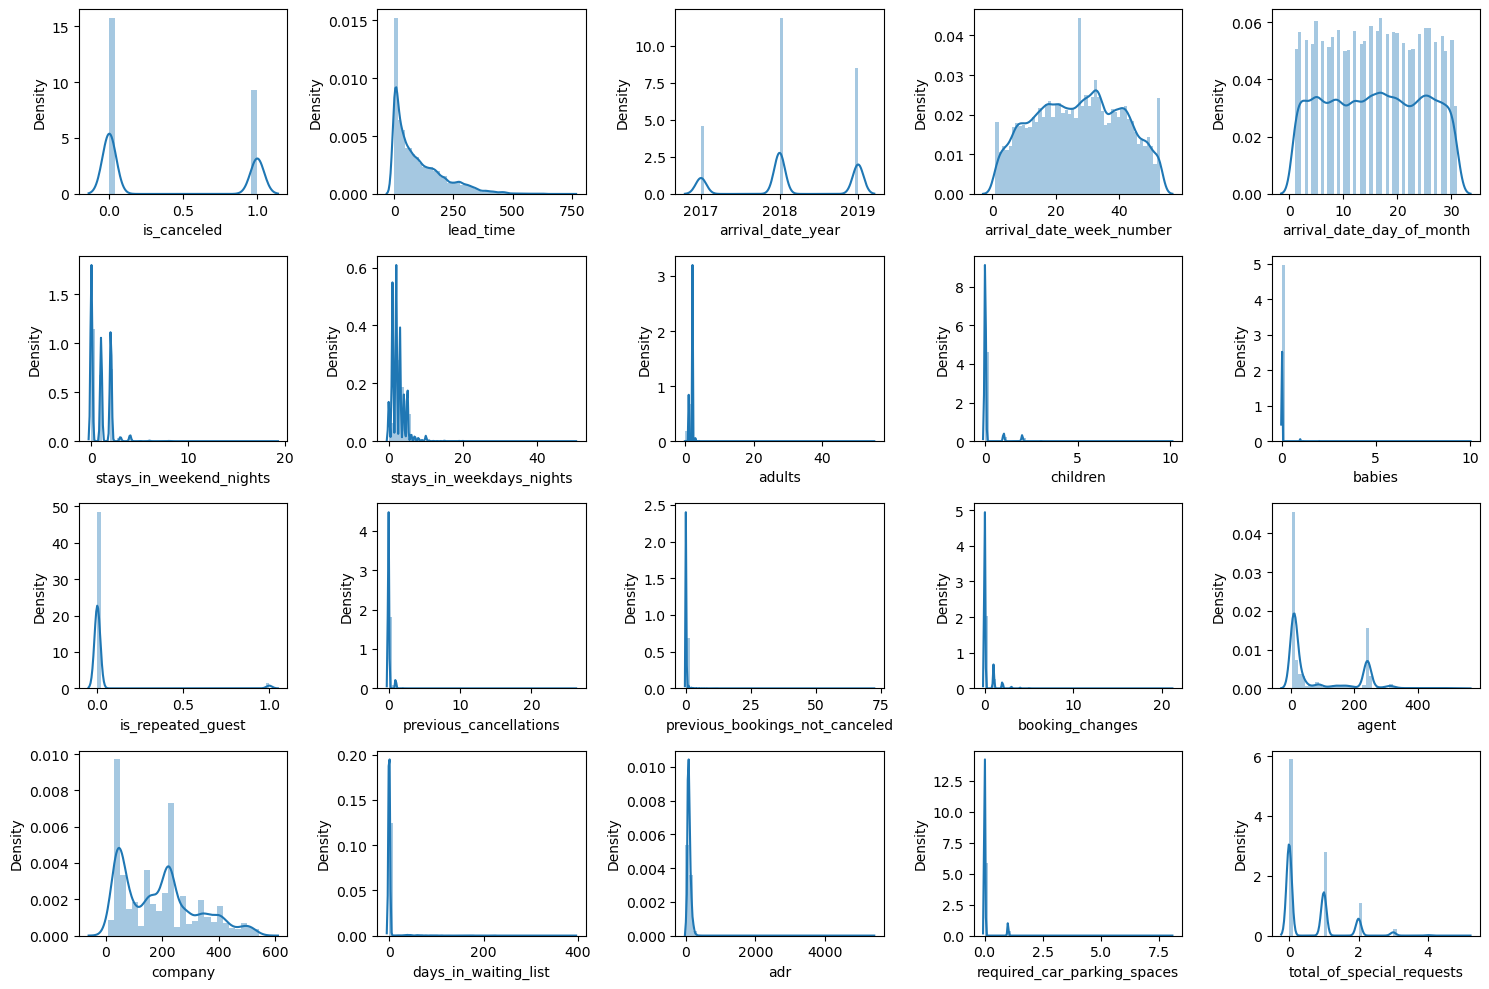

In [8]:
#cek distribusi fitur numerik

nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == float)].columns.tolist()

plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    plt.subplot(4, 5, i+1)
    sns.distplot(df[nums[i]])
    plt.tight_layout()

**Fitur-fitur cenderung positively skewed, tetapi arrival_date_week_number dan arrival_date_day_of_month memiliki distribusi yang cenderung normal**

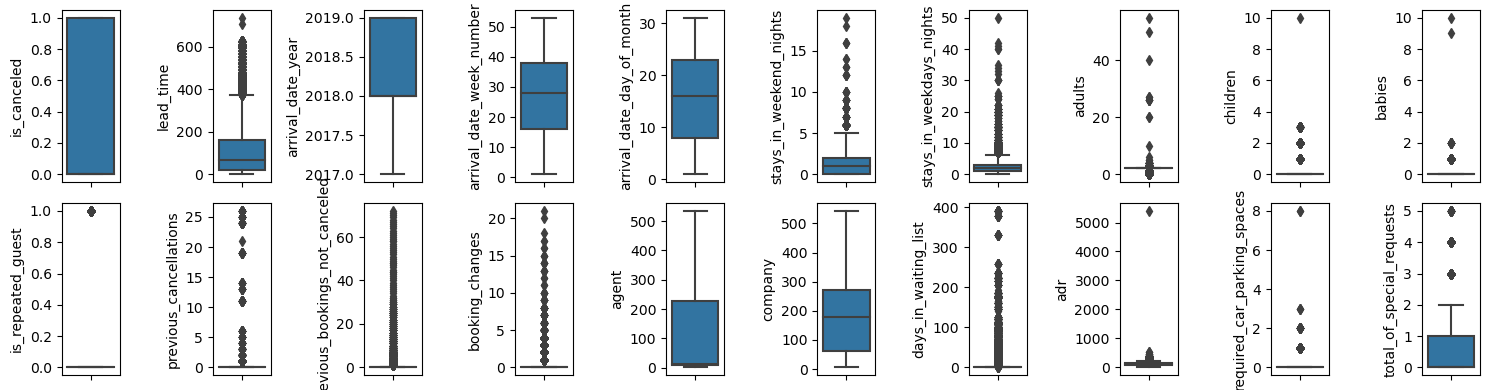

In [9]:
#cek outlier fitur numerikal

plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(2, 10, i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

**- Fitur mayoritas memiliki outlier**

**- Nilai ekstrim pada fitur adr, required_car_parking_spaces, children, dan babies**

**nantinya akan dilakukan penghilangan nilai ekstrim, agar tidak mengurangi insight yang dihasilkan**

In [10]:
#cek data anomali tamu = 0 (tedapat kamar yang dibooking, tapi tidak ada tamu yang menginap)

guest_0 = df['adults']+df['children']+df['babies']
guest_0 = df[guest_0 == 0]
guest_0.shape[0]

180

**Terdapat 180 kamar yang tidak memiliki tamu, data ini akan didrop**

### Fitur Kategorikal

In [11]:
df.describe(exclude=np.number).round(2).T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,October,13877
meal,119390,5,Breakfast,92310
city,118902,177,Kota Denpasar,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Personal,89613
reservation_status,119390,3,Check-Out,75166


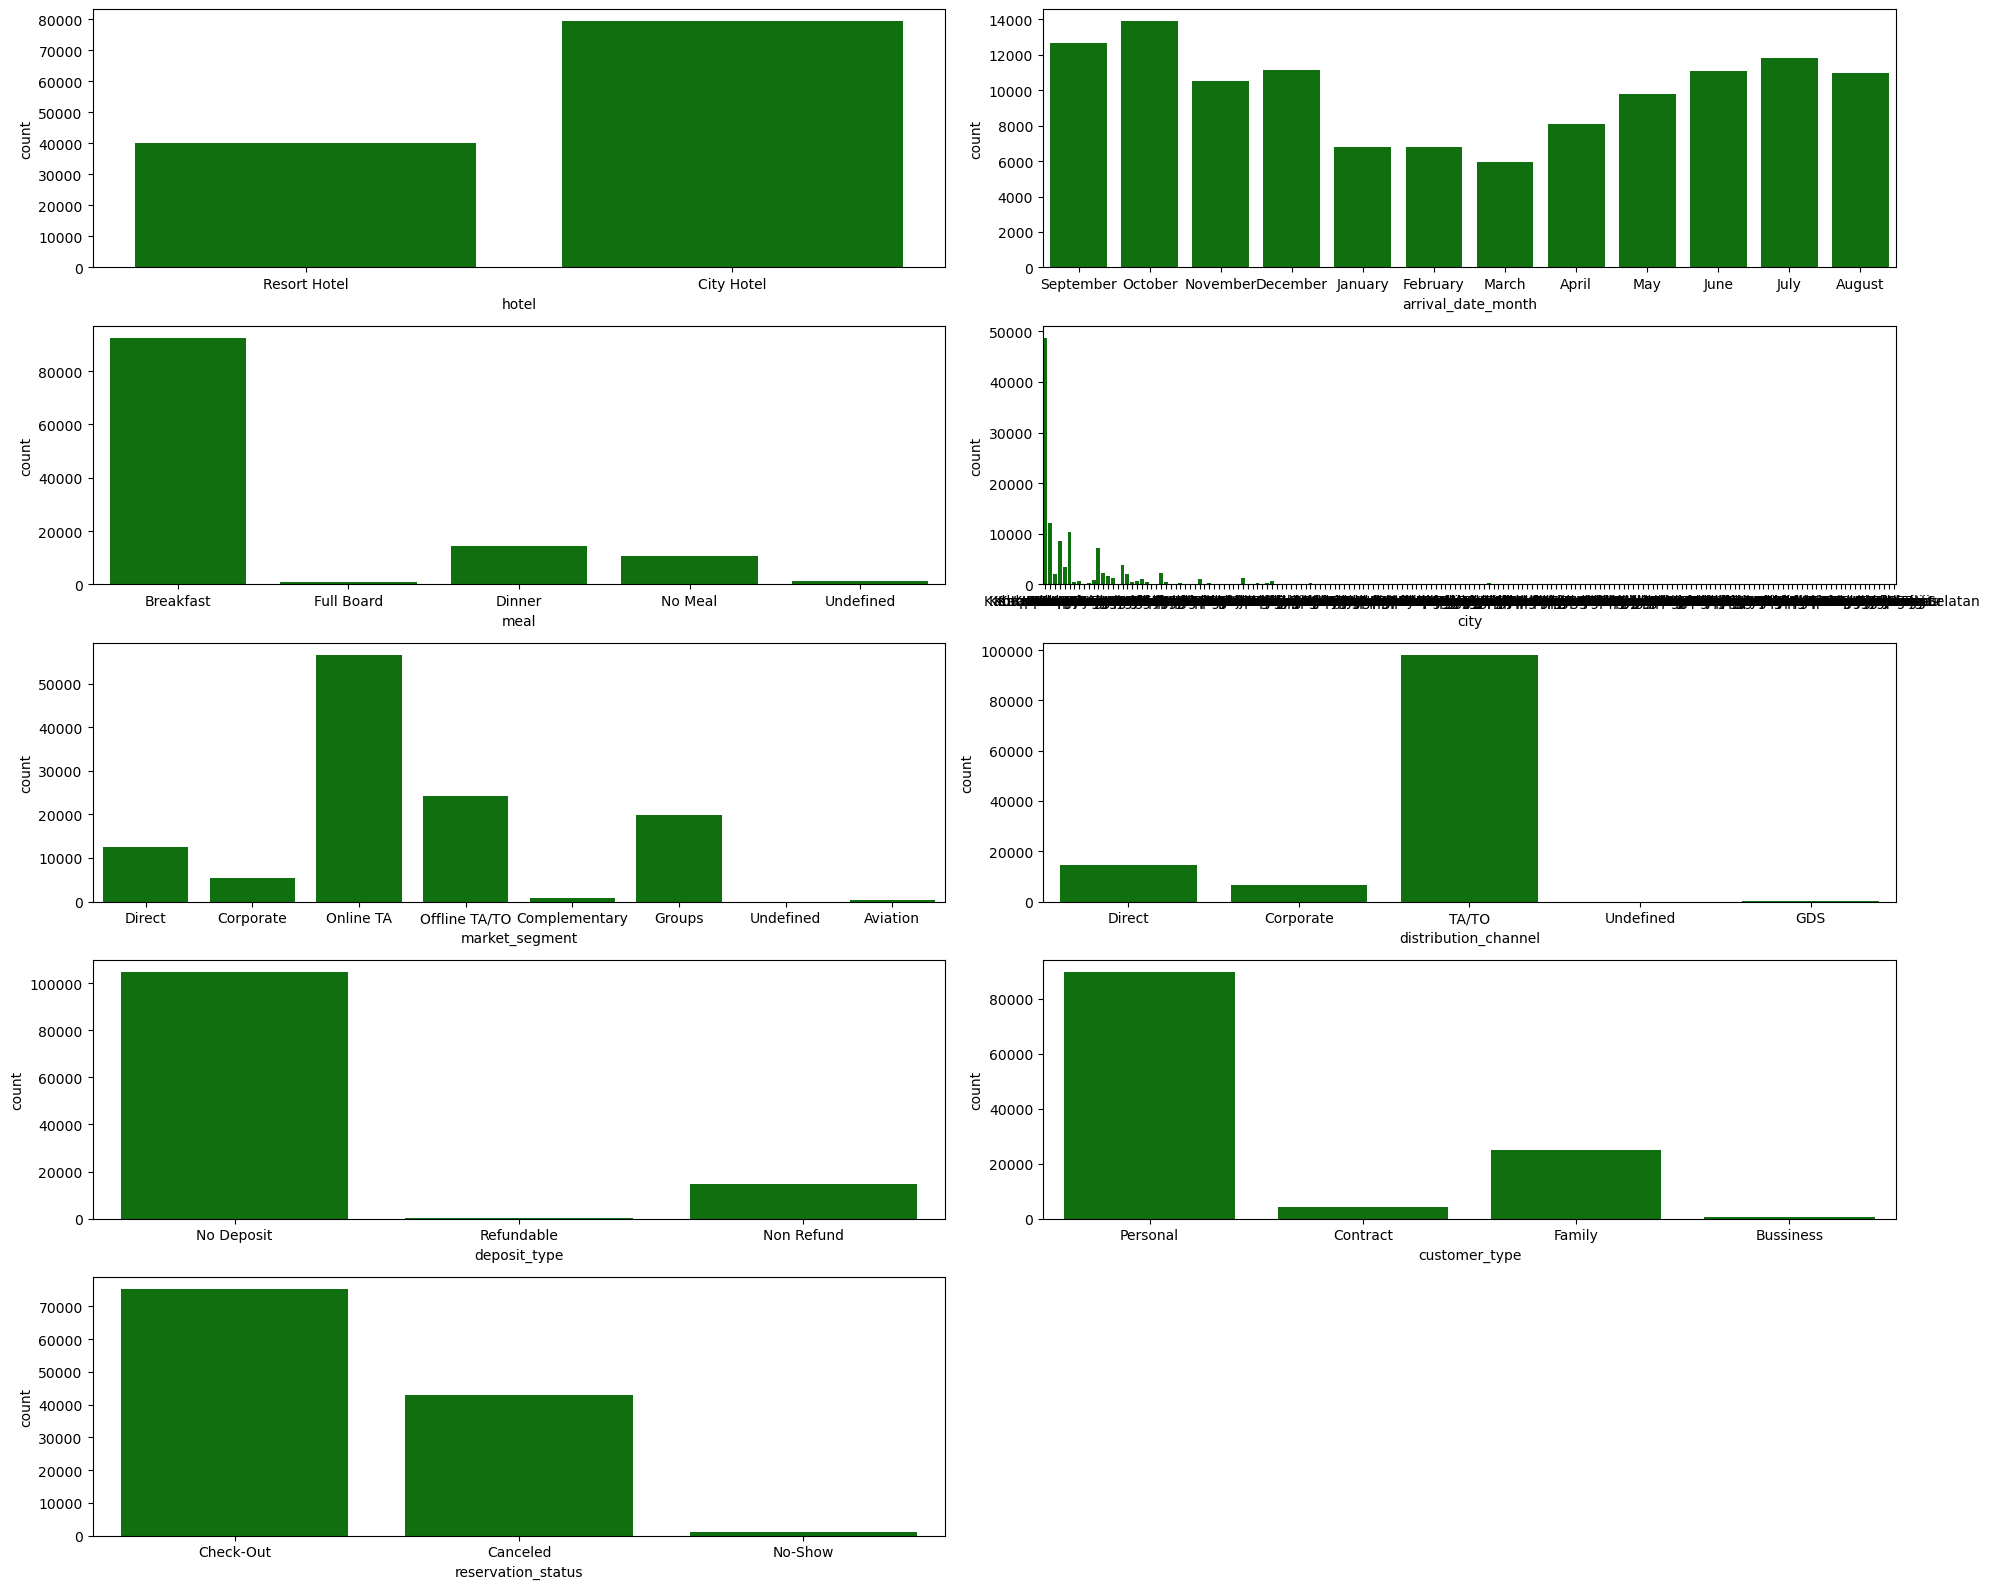

In [12]:
#cek distribusi fitur kategorikal

cats = df.loc[:, (df.dtypes == 'object')].columns.tolist()
plt.figure(figsize=(20, 16))
for i in range(0, len(cats)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df[cats[i]], color='green')
    plt.tight_layout()

## Cleansing Data

In [13]:
df_clean = df.copy()

In [14]:
#Handling null values

#children, agent, company
ft = ['children', 'agent', 'company']
for col in ft:
    df_clean[col].fillna(0, inplace=True)

# city
df_clean['city'].fillna('Undefined', inplace=True)

In [15]:
df_clean.isna().sum().sum()

0

**children (4) - null value diisi dengan 0, mengindikasikan tamu tidak membawa anak-anak.**

**agent (16.340) - null value diisi dengan 0, mengindikasikan tamu melakukan reservasi mandiri atau tidak melalui agen.**

**company (112.593) - null value diisi dengan 0, mengindikasikan tamu tidak bersal dari company.**

**city (488) - null value diisi dengan 'Undefined', karena kota tidak diketahui secara pasti.**

In [16]:
#Handling inconsistent and extream values

#Kategori Meal:
    #"With Meal" = Breakfast, Full Board, Dinner
    #"No Meal" = No Meal, Undefined
    
df_clean['meal'].replace('Undefined', 'No Meal', inplace = True)
df_clean['meal'].replace(['Breakfast', 'Full Board', 'Dinner'], 'With Meal', inplace = True)

In [17]:
df_clean['meal'].unique()

array(['With Meal', 'No Meal'], dtype=object)

In [18]:
#Mengganti tipe data "children" dari float64 ke int64 (integer)

df_clean['children'] = df_clean['children'].astype('int64')

In [19]:
#Menghapus extream values

##extream adr
index_adr = df_clean[(df_clean['adr'] < 0) | (df_clean['adr'] > 5000)]
df_clean.drop(index = index_adr.index, inplace=True)

##required_car_parking_spaces
index_parking = df_clean[(df_clean['required_car_parking_spaces'] == 8)]
df_clean.drop(index = index_parking.index, inplace=True)

##babies
index_bb = df_clean[(df_clean['babies'] > 8)]
df_clean.drop(index = index_bb.index, inplace=True)

##babies
index_ch = df_clean[(df_clean['children'] == 10)]
df_clean.drop(index = index_ch.index, inplace=True)

##tidak ada tamu
index_guest_0 = df_clean['adults']+df_clean['children']+df_clean['babies']
index_guest_0 = df_clean[index_guest_0 == 0]
df_clean.drop(index = index_guest_0.index, inplace=True)

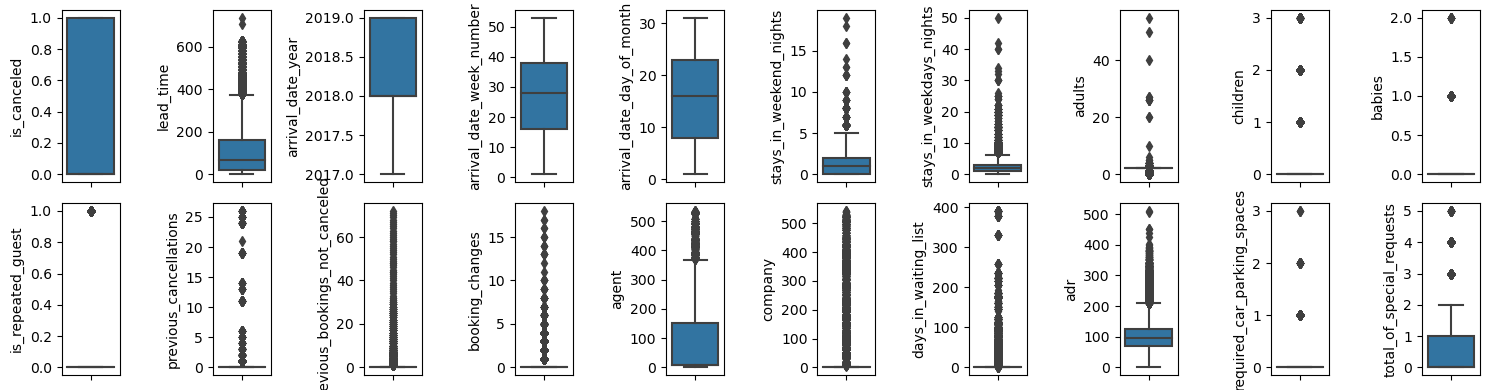

In [20]:
#cek outlier fitur numerikal
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(2, 10, i+1)
    sns.boxplot(y=df_clean[nums[i]], orient='v')
    plt.tight_layout()

**Handling duplicated data**

Terdapat sekitar 27,86% jumlah data yang duplikat, jika melakukan penghapusan data duplikat dapat mempengaruhi nilai statistik dalam analisis.
Pada dataset tidak terdapat unik_id/unik_booking_id dan tanggal, data duplikat bisa saja memiliki informasi penting. Mungkin terdapat pemesanan yang sama terjadi pada waktu yang berbeda.

In [21]:
print('Total data sebelum dibersihkan :', df.shape[0])
print('Total data setelah dibersihkan :', df_clean.shape[0])

Total data sebelum dibersihkan : 119390
Total data setelah dibersihkan : 119203


# 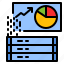Data Visualization

# TASK 2: Monthly Hotel Booking Analysis Based on Hotel Type

In [22]:
df_c = df_clean.copy()

## Rasio Total Pemesanan Berdasarkan Tipe Hotel

In [23]:
#summary total booking

hotel_type = df_c.groupby('hotel')[['hotel']].count()

hotel_type.columns = ['total']
hotel_type.reset_index(inplace=True)
hotel_type

,hotel,total
0,City Hotel,79160
1,Resort Hotel,40043


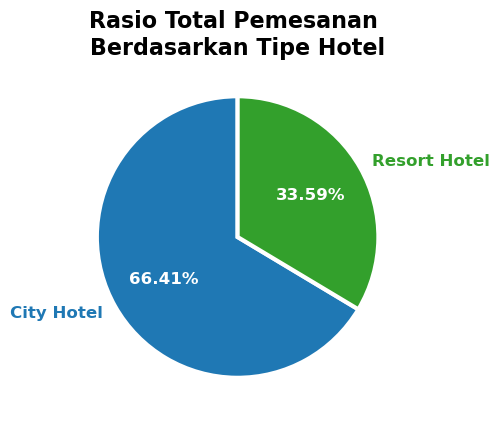

In [24]:
#Plotting
fig, ax = plt.subplots(figsize=(5, 5))
# ------------------------
colors = ['#1f78b4', '#33a02c']
patches, texts, pcts = ax.pie(
    hotel_type['total'], labels=hotel_type['hotel'], autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'large'},
    startangle=90, colors=colors)

# Konfigurasi tambahan
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())

plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)

# Judul plot
ax.set_title('Rasio Total Pemesanan \nBerdasarkan Tipe Hotel', fontsize=16, pad=5, loc='center', fontweight='bold')

plt.tight_layout()
plt.show()

- City Hotel memiliki porsi lebih besar dalam jumlah total pemesanan dibandingkan Resort Hotel. City Hotel 66,41% sedangkan Resort Hotel 33,59%.
- Hal Ini menunjukkan preferensi yang kuat terhadap City Hotel, mungkin disebabkan oleh lokasi yang lebih strategis dan aksesibilitas yang baik, ideal bagi tamu yang melakukan perjalanan bisnis atau mengunjungi tempat perbelanjaan, dan juga mengunjungi wisata-wisata yang ada di kota.
- Fasilitas modern seperti pusat kebugaran, restoran, dan layanan kamar yang lengkap di City Hotel juga dapat menarik tamu yang mencari kenyamanan dan kemudahan selama menginap.
- Di sisi lain, Resort Hotel mungkin kurang diminati karena harga yang lebih tinggi atau ketersediaan terbatas, terutama selama musim liburan. Mungkin bisa jadi para tamu yang memesan hotel ini kemungkinan besar mencari pengalaman liburan dan relaksasi, karena Resort Hotel sering ditempatkan di lokasi-lokasi seperti tepi pantai, pegunungan, atau daerah pedesaan yang tenang, dengan fasilitas yang lengkap untuk memenuhi kebutuhan liburan mereka.

## Ratio Total Booking per Month

In [25]:
#summary aggregasi total booking per month
monthly_booking = df_c.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique', 'count']).reset_index()
monthly_booking

,hotel,arrival_date_month,nunique,count
0,City Hotel,April,2,4950
1,City Hotel,August,2,7885
2,City Hotel,December,2,7593
3,City Hotel,February,2,4114
4,City Hotel,January,2,4336
5,City Hotel,July,2,8221
6,City Hotel,June,2,7469
7,City Hotel,March,2,3729
8,City Hotel,May,2,6433
9,City Hotel,November,2,7392


Dari data, terlihat bahwa sebagian besar bulan dalam dataset memiliki hanya dua nilai unik kecuali untuk bulan Oktober dan September. Variasi ini dapat memengaruhi akurasi perhitungan dan menghasilkan nilai yang mungkin tidak sepenuhnya valid. Untuk menanggulangi hal ini, dilakukan normalisasi dengan menghitung rata-rata (total dibagi nunique) untuk memastikan konsistensi dan keakuratan dalam analisis.

### Normalization

In [26]:
#menghitung rata-rata dari count dibagi nunique
monthly_booking['average'] = round(monthly_booking['count']/monthly_booking['nunique'])
monthly_booking

,hotel,arrival_date_month,nunique,count,average
0,City Hotel,April,2,4950,2475.0
1,City Hotel,August,2,7885,3942.0
2,City Hotel,December,2,7593,3796.0
3,City Hotel,February,2,4114,2057.0
4,City Hotel,January,2,4336,2168.0
5,City Hotel,July,2,8221,4110.0
6,City Hotel,June,2,7469,3734.0
7,City Hotel,March,2,3729,1864.0
8,City Hotel,May,2,6433,3216.0
9,City Hotel,November,2,7392,3696.0


### Sort Month Value

In [27]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_booking['month'] = monthly_booking['arrival_date_month'].str[:3]
monthly_booking['month'] = pd.Categorical(monthly_booking['month'], categories=months)
monthly_booking.sort_values('month')

,hotel,arrival_date_month,nunique,count,average,month
4,City Hotel,January,2,4336,2168.0,Jan
16,Resort Hotel,January,2,2435,1218.0,Jan
3,City Hotel,February,2,4114,2057.0,Feb
15,Resort Hotel,February,2,2645,1322.0,Feb
7,City Hotel,March,2,3729,1864.0,Mar
19,Resort Hotel,March,2,2191,1096.0,Mar
0,City Hotel,April,2,4950,2475.0,Apr
12,Resort Hotel,April,2,3102,1551.0,Apr
20,Resort Hotel,May,2,3331,1666.0,May
8,City Hotel,May,2,6433,3216.0,May


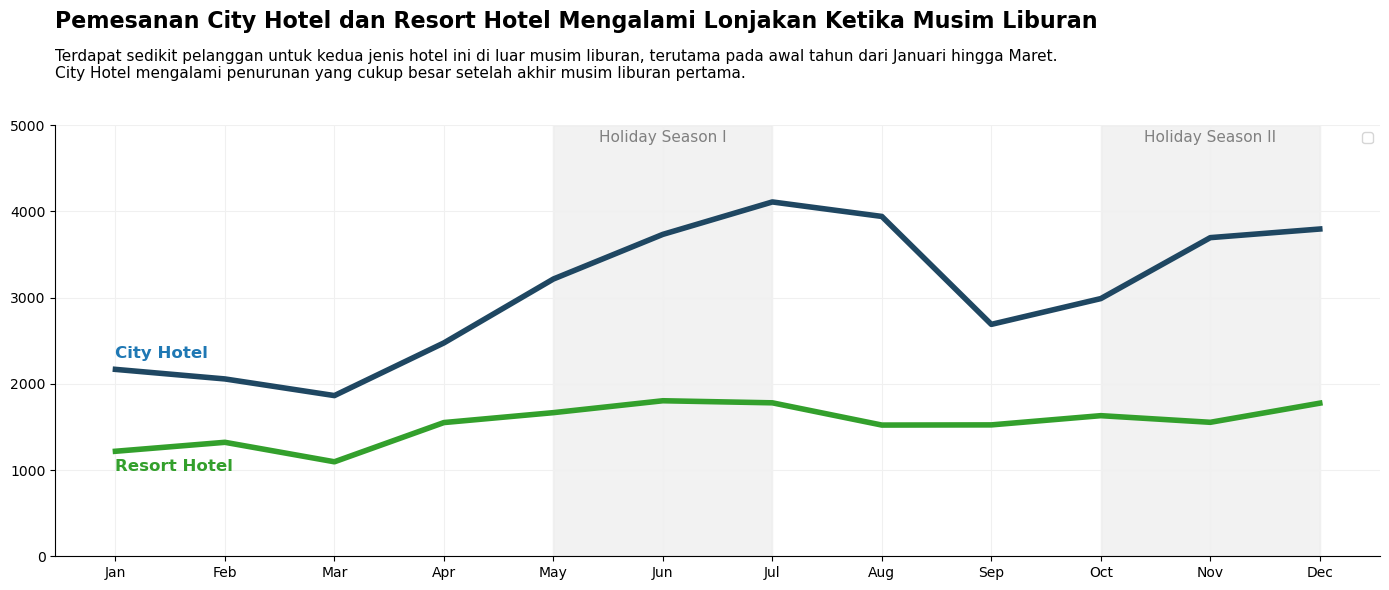

In [29]:
#visualisasi

plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

sns.lineplot(x='month', y='average', hue='hotel', data=monthly_booking, palette={'City Hotel': '#1f4762', 'Resort Hotel': '#33a02c'}, linewidth=4)
plt.grid(color='#f0f0f0')
plt.ylim(0, 5000)

#Mengatur label
plt.tick_params(axis='both', which='major', labelsize=10)
plt.ylabel('')
plt.xlabel('')

#Legend
plt.legend([])
plt.text(x=0, y=2300, s='City Hotel', fontsize=12, color='#1f78b4', ha='left', fontweight='bold')
plt.text(x=0, y=990, s='Resort Hotel', fontsize=12, color='#33a02c', ha='left', fontweight='bold')

#Judul dan deskripsi
plt.title('Pemesanan City Hotel dan Resort Hotel Mengalami Lonjakan Ketika Musim Liburan', fontsize=16, pad=70, loc='left', fontweight='bold')
plt.text(y=5700, x=-0.55, s='Terdapat sedikit pelanggan untuk kedua jenis hotel ini di luar musim liburan, terutama pada awal tahun dari Januari hingga Maret. \nCity Hotel mengalami penurunan yang cukup besar setelah akhir musim liburan pertama.',
         ha='left', va='center', size=11)

#Menambahkan area untuk holiday season I
plt.fill_between([4, 5, 6], 0, 5000, color='grey', alpha=0.1)
plt.text(x=5, y=4800, s='Holiday Season I', fontsize=11, color='grey', ha='center')

#Menambahkan area untuk holiday season II
plt.fill_between([9, 10, 11], 0, 5000, color='grey', alpha=0.1)
plt.text(x=10, y=4800, s='Holiday Season II', fontsize=11, color='grey', ha='center')

plt.tight_layout()
plt.show()

- Pada musim liburan, permintaan pemesanan hotel biasanya melonjak.
- Bulan Mei - Agustus menjadi periode paling ramai dalam pemesanan kedua tipe hotel, terutama City Hotel yang mengalami lonjakan yang signifikan. Hal ini didorong oleh liburan sekolah dan banyaknya hari libur nasional seperti cuti bersama serta perayaan keagamaan seperti Ramadan dan Lebaran antara tahun 2017-2019, memberikan banyak kesempatan bagi orang-orang untuk berlibur dan memesan hotel. Sedangkan pada musim liburan Oktober - Desember bertepatan depan dengan natal dan tahun baru.
- Periode Januari - Maret mencatat tingkat pemesanan terendah, sebagian besar karena minimnya hari libur nasional, awal tahun ajaran baru bagi pelajar, serta aktivitas perjalanan bisnis yang umumnya tidak terlalu sibuk pada awal tahun.

# TASK 3: Impact Analysis of Stay Duration on Hotel Bookings Cancelation Rate

## Total Cancelation Rate

In [47]:
#total pembatalan City Hotel

df_city = df_c[df_c['hotel']=='City Hotel']

#group fitur iscanceled & agregasi
cancel = df_city.groupby('is_canceled')[['is_canceled']].count()

cancel.columns = ['total']
cancel.reset_index(inplace=True)

lgn = {0: 'Not Canceled',
       1: 'Canceled'}
cancel['is_canceled'] = cancel['is_canceled'].map(lgn)
cancel

,is_canceled,total
0,Not Canceled,46082
1,Canceled,33078


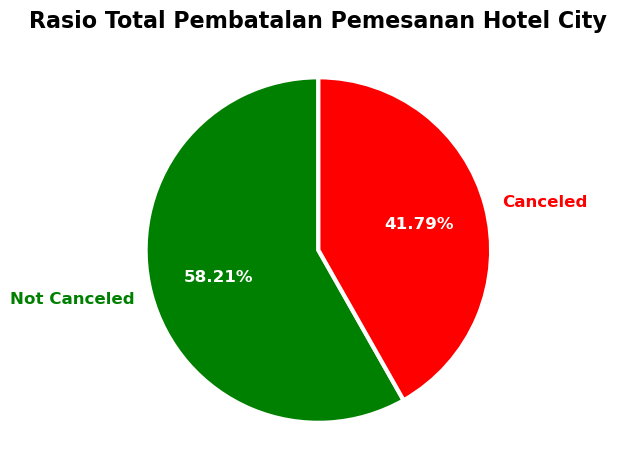

In [49]:
#visualisasi total pembatalan Hotel City

fig, ax = plt.subplots(figsize=(6, 6))
#-------------------------------------------------------------------
patches, texts, pcts = ax.pie(
    cancel['total'], labels=cancel['is_canceled'], autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'large'},
    startangle=90, colors=['#008000', '#ff0000'])
#-------------------------------------------------------------------
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
ax.set_title('Rasio Total Pembatalan Pemesanan Hotel City', fontsize=16, pad=5, loc='center',fontweight='bold')
plt.tight_layout()

In [41]:
#total pembatalan Resort Hotel

df_resort = df_c[df_c['hotel']=='Resort Hotel']

#group fitur iscanceled & agregasi
cancel = df_resort.groupby('is_canceled')[['is_canceled']].count()

cancel.columns = ['total']
cancel.reset_index(inplace=True)

lgn = {0: 'Not Canceled',
       1: 'Canceled'}
cancel['is_canceled'] = cancel['is_canceled'].map(lgn)
cancel

,is_canceled,total
0,Not Canceled,28924
1,Canceled,11119


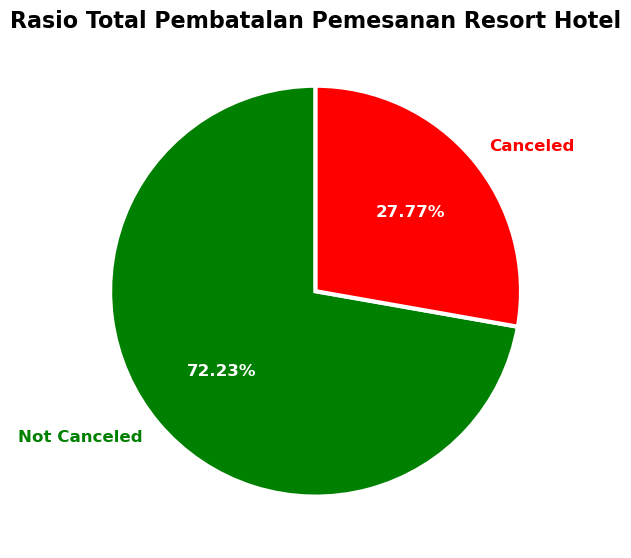

In [44]:
#visualisasi total pembatalan Resort Hotel

fig, ax = plt.subplots(figsize=(6, 6))

patches, texts, pcts = ax.pie(
    cancel['total'], labels=cancel['is_canceled'], autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'large'},
    startangle=90, colors=['#008000', '#ff0000'])

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
ax.set_title('Rasio Total Pembatalan Pemesanan Resort Hotel', fontsize=16, pad=5, loc='center',fontweight='bold')
plt.tight_layout()

Rasio pembatalan yang lebih tinggi di City Hotel (41,79%) dibandingkan dengan Resort Hotel (27,77%) menunjukkan bahwa tamu cenderung lebih sering membatalkan pemesanan di City Hotel. Hal ini bisa disebabkan oleh beberapa faktor:
- City Hotel biasanya berada di pusat kota dengan banyak pilihan akomodasi lainnya. Tamu mungkin lebih mudah membatalkan dan memilih hotel lain di dekatnya.
- Banyak tamu City Hotel mungkin adalah orang-orang yang melakukan perjalanan bisnis yang perjalanannya lebih mudah berubah atau dibatalkan.

Resort Hotel memiliki tingkat pembatalan yang lebih rendah (27,77%), yang menunjukkan tamu cenderung lebih pasti dengan rencana mereka yang telah dibuat.
- Resort Hotel biasanya dipilih untuk liburan yang direncanakan jauh-jauh hari. Tamu cenderung lebih pasti dengan jadwal liburan mereka, mengurangi kemungkinan pembatalan.
- Resort Hotel sering terletak di lokasi eksklusif seperti pantai atau pegunungan, yang membuat tamu lebih sulit untuk menemukan alternatif lain yang setara.

## Stay Duration

In [51]:
#total stay
df_c['total_stay_duration'] = df_c['stays_in_weekdays_nights'] + df_c['stays_in_weekend_nights']
df_c.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_stay_duration
23399,Resort Hotel,0,105,2018,June,17,22,1,2,2,...,No Deposit,240.0,0.0,0,Personal,52.20,0,1,Check-Out,3
80535,City Hotel,0,11,2017,January,47,17,0,1,2,...,No Deposit,9.0,0.0,0,Contract,85.00,0,1,Check-Out,1
113379,City Hotel,0,158,2019,August,23,6,0,1,1,...,No Deposit,8.0,0.0,0,Bussiness,117.00,0,2,Check-Out,1
56760,City Hotel,1,208,2018,November,38,12,5,12,3,...,No Deposit,9.0,0.0,0,Personal,150.45,0,0,Canceled,17
79351,City Hotel,0,32,2017,December,43,24,1,1,1,...,No Deposit,9.0,0.0,0,Contract,120.00,0,1,Check-Out,2


<Axes: xlabel='total_stay_duration', ylabel='Count'>

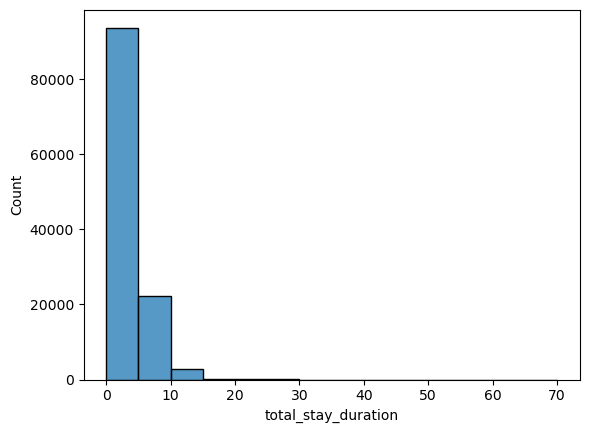

In [52]:
#visualisasi total stay

sns.histplot(df_c['total_stay_duration'], binwidth=5)

In [54]:
unik = df_c['total_stay_duration'].nunique()
mx = df_c['total_stay_duration'].max()
mn = df_c['total_stay_duration'].min()

print('Nilai unik:', unik)
print('Durasi maksimal:', mx)
print('Durasi minimal:', mn)

Nilai unik: 42
Durasi maksimal: 69
Durasi minimal: 0


Durasi menginap di hotel terdapat 42 nilai unik dengan durasi maksimal mencapai 69 hari dan durasi minimal 0 hari. Ini menunjukkan adanya variasi besar dalam lama menginap tamu. Untuk memudahkan interpretasi, durasi menginap akan dikelompokkan dalam kategori mingguan sebagai berikut:
- < 1 = 0 - 7 hari
- 1 - 2 = 8 - 14 hari
- 2 - 3 = 15 - 21 hari
- 2 - 4 = 22 - 28 hari
- '> 4 = > 28 hari

In [55]:
df_c['total_stay_week'] = np.where((df_c['total_stay_duration']) < 8, '< 1' ,
                                   np.where((df_c['total_stay_duration']) < 15, '1-2',
                                   np.where((df_c['total_stay_duration']) < 22, '2-3', 
                                   np.where((df_c['total_stay_duration']) < 29, '3-4', '> 4'))))

df_c['total_stay_week'].value_counts()

total_stay_week
< 1    113979
1-2      4795
2-3       274
3-4       108
> 4        47
Name: count, dtype: int64

## Cancelation Rate by Stay Duration

In [56]:
#group cancel rate based on totel type, duration
cancel_rate = df_c.groupby(['hotel', 'total_stay_week']).agg({'is_canceled' : 'sum', 'arrival_date_day_of_month' : 'count'}).reset_index()
cancel_rate['cancel_rate'] = 100*(cancel_rate['is_canceled'] / cancel_rate['arrival_date_day_of_month']).round(2)
cancel_rate

#sorted by week
week = ['< 1', '1-2', '2-3', '3-4', '> 4']
cancel_rate['total_stay_week'] = pd.Categorical(cancel_rate['total_stay_week'], categories = week)
cancel_rate = cancel_rate.sort_values('total_stay_week')
cancel_rate

,hotel,total_stay_week,is_canceled,arrival_date_day_of_month,cancel_rate
3,City Hotel,< 1,32403,77939,42.0
8,Resort Hotel,< 1,9917,36040,28.0
0,City Hotel,1-2,558,1069,52.0
5,Resort Hotel,1-2,1077,3726,29.0
1,City Hotel,2-3,76,105,72.0
6,Resort Hotel,2-3,79,169,47.0
2,City Hotel,3-4,21,25,84.0
7,Resort Hotel,3-4,39,83,47.0
4,City Hotel,> 4,20,22,91.0
9,Resort Hotel,> 4,7,25,28.0


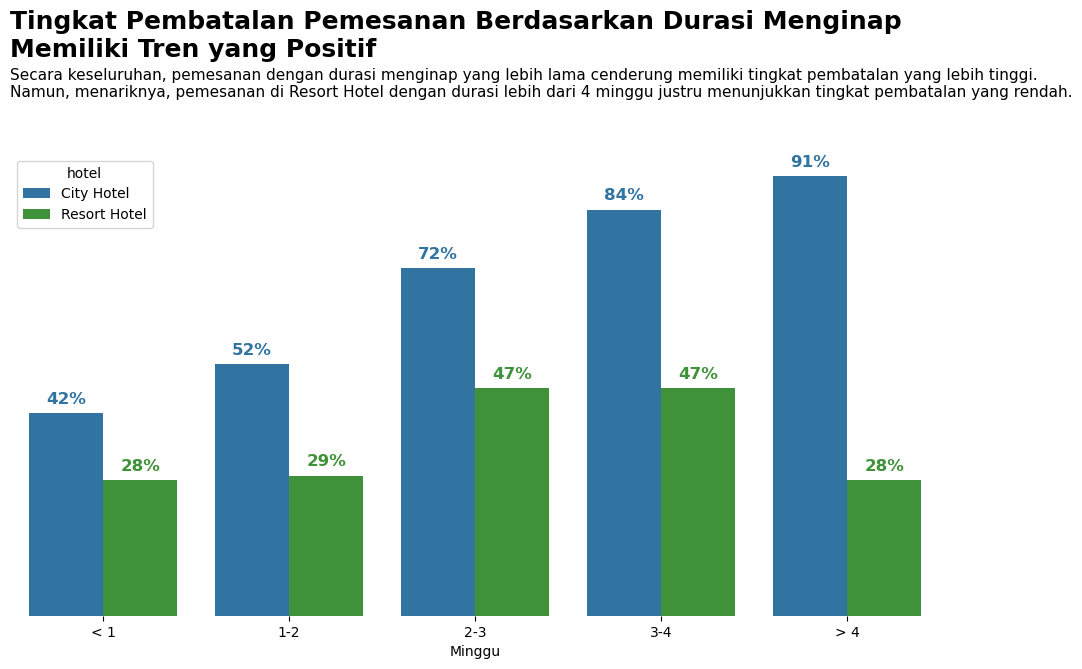

In [62]:
#visualisasi

plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(12,6)

#set border
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

#plot
ax = sns.barplot(x = cancel_rate['total_stay_week'], y = cancel_rate['cancel_rate'], hue=cancel_rate['hotel'], 
                 hue_order = ['City Hotel', 'Resort Hotel'], palette=['#1f78b4', '#33a02c'])

#mengatur label
plt.tick_params(axis = 'y', which = 'both', left = False, right = False, labelleft = False)
plt.ylabel('')
plt.xlabel('Minggu')

#menambahkan judul dan deskripsi
plt.title('Tingkat Pembatalan Pemesanan Berdasarkan Durasi Menginap \nMemiliki Tren yang Positif', fontsize=18, pad=70, loc='left',fontweight='bold')
plt.text(y = 110, x = -0.5, s = 'Secara keseluruhan, pemesanan dengan durasi menginap yang lebih lama cenderung memiliki tingkat pembatalan yang lebih tinggi. \nNamun, menariknya, pemesanan di Resort Hotel dengan durasi lebih dari 4 minggu justru menunjukkan tingkat pembatalan yang rendah.',
         ha='left', va='center', size=11)


patches
for a in ax.patches:
    txt = np.round(a.get_height(), decimals=2)
    anot = str(round(txt))
    color = a.get_facecolor()
    ax.annotate(anot+'%', (a.get_x()+a.get_width()/2, a.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points', fontsize=12, fontweight='bold', color=color)

Tingkat pembatalan yang tinggi di City Hotel untuk durasi menginap yang lebih lama mengindikasikan tingginya ketidakpastian dan perubahan dalam rencana tamu yang mungkin memiliki perjalanan bisnis. Sebaliknya, Resort Hotel menunjukkan tingkat pembatalan yang lebih rendah secara keseluruhan, mencerminkan komitmen yang lebih tinggi dari tamu yang akan berlibur.

# TASK 4: Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

## Duration of Lead Time

<Axes: xlabel='lead_time', ylabel='Count'>

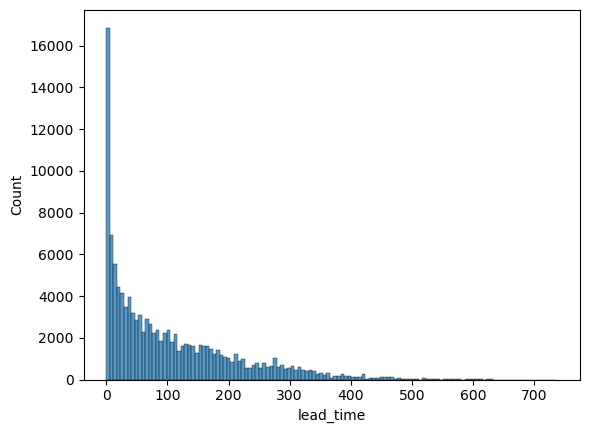

In [63]:
#distribusi lead time
sns.histplot(df_c['lead_time'])

In [64]:
unik = df_c['lead_time'].nunique()
mx = df_c['lead_time'].max()
mn = df_c['lead_time'].min()

print('Nilai unik:', unik)
print('Durasi maksimal:', mx)
print('Durasi minimal:', mn)

Nilai unik: 479
Durasi maksimal: 737
Durasi minimal: 0


Lead time berkisar antara 0 hingga 709 hari. Untuk mempermudah interpretasi, lead time ini akan dikategorikan berdasarkan bulan.

In [67]:
df_c['lead_category'] = np.where((df_c['lead_time']) < 31, '1',
                        np.where((df_c['lead_time']) <= 61, '2',
                        np.where((df_c['lead_time']) <= 91, '3', 
                        np.where((df_c['lead_time']) <= 121, '4',
                        np.where((df_c['lead_time']) <= 151, '5',
                        np.where((df_c['lead_time']) <= 181, '6',
                        np.where((df_c['lead_time']) <= 211, '7', 
                        np.where((df_c['lead_time']) <= 241, '8',
                        np.where((df_c['lead_time']) <= 271, '9',
                        np.where((df_c['lead_time']) <= 301, '10', 
                        np.where((df_c['lead_time']) <= 331, '11',
                        np.where((df_c['lead_time']) <= 361, '12', '>1 tahun'))))))))))))
df_c['lead_category'].value_counts()

lead_category
1           38578
2           17462
3           12398
4           10359
5            8237
6            7784
7            5609
8            4180
10           3524
>1 tahun     3405
9            3377
11           2581
12           1709
Name: count, dtype: int64

## Cancelation Rate by Lead Time

In [68]:
#summary
lead_cancel = df_c.groupby(['hotel', 'lead_category']).agg({'is_canceled' : 'sum', 'arrival_date_day_of_month' : 'count'}).reset_index()
lead_cancel['lead_cr'] = 100*(lead_cancel['is_canceled'] / lead_cancel['arrival_date_day_of_month']).round(2)

#sortir
cat = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '>1 tahun']
lead_cancel['lead_category'] = pd.Categorical(lead_cancel['lead_category'], categories = cat)
lead_cancel = lead_cancel.sort_values('lead_category')
lead_cancel

,hotel,lead_category,is_canceled,arrival_date_day_of_month,lead_cr
0,City Hotel,1,5184,23243,22.0
13,Resort Hotel,1,1984,15335,13.0
4,City Hotel,2,4802,12253,39.0
17,Resort Hotel,2,1593,5209,31.0
5,City Hotel,3,3601,8774,41.0
18,Resort Hotel,3,1279,3624,35.0
19,Resort Hotel,4,1157,2993,39.0
6,City Hotel,4,3464,7366,47.0
20,Resort Hotel,5,1040,2537,41.0
7,City Hotel,5,2574,5700,45.0


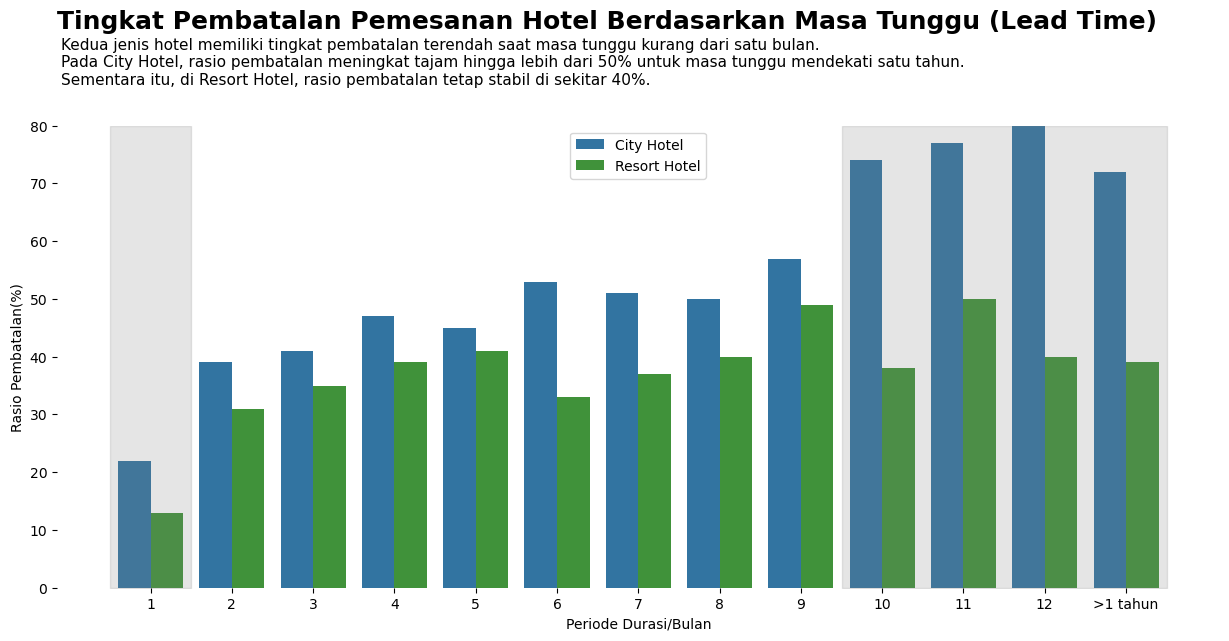

In [73]:
#visualisasi
plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(15,6)

#set border
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

#plot
ax = sns.barplot(x = lead_cancel['lead_category'], y = lead_cancel['lead_cr'], hue=lead_cancel['hotel'], 
                 hue_order = ['City Hotel', 'Resort Hotel'], palette=['#1f78b4', '#33a02c'])
plt.ylim(0,80)

#mengatur label
plt.ylabel('Rasio Pembatalan(%)')
plt.xlabel('Periode Durasi/Bulan')
plt.legend(loc='upper center')

#menambahkan judul dan deskripsi
plt.title('Tingkat Pembatalan Pemesanan Hotel Berdasarkan Masa Tunggu (Lead Time)', fontsize=18, pad=70, loc='left',fontweight='bold')
plt.text(y = 91, x = -1.1, s = 'Kedua jenis hotel memiliki tingkat pembatalan terendah saat masa tunggu kurang dari satu bulan. \nPada City Hotel, rasio pembatalan meningkat tajam hingga lebih dari 50% untuk masa tunggu mendekati satu tahun. \nSementara itu, di Resort Hotel, rasio pembatalan tetap stabil di sekitar 40%.',
         ha='left', va='center', size=11)

# -----------------------------------------------------------------------------------------------------------
# set cr 
plt.stackplot([-0.5, 0.5], [80], color='grey', alpha=0.2)
plt.stackplot([8.5, 12.5], [80], color='grey', alpha=0.2)

City Hotel mendominasi tingkat pembatalan, di mana pembatalan cenderung meningkat saat lead time mendekati satu tahun. Sebaliknya, pembatalan tetap rendah untuk lead time kurang dari satu bulan. Dengan memperhatikan tren ini, perusahaan dapat mempertimbangkan untuk menetapkan batas waktu maksimum untuk pemesanan guna mengurangi risiko pembatalan akibat perubahan rencana atau penemuan pilihan hotel lain yang lebih menarik bagi pelanggan.

# KESIMPULAN
Jawaban dari pertanyaan.

1. Jenis hotel apa yang paling sering dikunjungi oleh pelanggan?
   
   Yaitu City Hotel, karena City Hotel memiliki porsi lebih besar dalam jumlah total pemesanan dibandingkan Resort Hotel.

2. Apakah durasi menginap mempengaruhi tingkat pembatalan pemesanan hotel?
    
    Ya, mempengaruhi. Pada City Hotel, memiliki tingkat pembatalan yang lebih tinggi dengan durasi menginap semakin lama. Hal ini bisa disebabkan oleh faktor seperti perubahan rencana, kebutuhan mendadak, atau situasi yang tidak terduga.

3. Apakah jarak waktu antara pemesanan hotel dan hari kedatangan tamu mempengaruhi tingkat pembatalan pemesanan hotel?

    Ya, mempengaruhi. Pada City Hotel,  pembatalan cenderung meningkat saat lead time mendekati satu tahun. Sebaliknya, pembatalan tetap rendah untuk lead time kurang dari satu bulan. 